In [ ]:
import cudaq
from cudaq import spin
import numpy as np
from math import pi
from typing import List
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator, NullLocator
import matplotlib.patches as mpatches
import os
import pandas as pd
import pickle
import torch
from torch.optim import Adam
from torch.optim.lr_scheduler import LinearLR, ExponentialLR, SequentialLR, CyclicLR

In [2]:
for i in np.ndindex(2, 2, 2, 2):
    print(np.array(i))

ss = np.array([0, 1])
# a = np.array(np.ndindex(2, 2, 2, 2))
# print(ss[a])

[0 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 1 1]
[0 1 0 0]
[0 1 0 1]
[0 1 1 0]
[0 1 1 1]
[1 0 0 0]
[1 0 0 1]
[1 0 1 0]
[1 0 1 1]
[1 1 0 0]
[1 1 0 1]
[1 1 1 0]
[1 1 1 1]


In [3]:
state = np.random.get_state()

np.random.uniform(0, 1, (2, 2))
print(np.random.randn(5))

np.random.set_state(state)
np.random.uniform(-2, 2, (2, 2))
print(np.random.randn(5))


[-1.74093832  0.19225369  0.17890355 -1.20671224 -0.02723775]
[-1.74093832  0.19225369  0.17890355 -1.20671224 -0.02723775]


In [4]:
a = 1.0
print(a.is_integer())

True


In [5]:
a = np.arange(25).reshape(5, 5)
b = np.array([1, 3, 1, 2, 1])
bb = np.diag(b)
print(a)
print(bb @ a @ bb)

print((b[None, :] * a) * b[:, None])

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[[ 0  3  2  6  4]
 [15 54 21 48 27]
 [10 33 12 26 14]
 [30 96 34 72 38]
 [20 63 22 46 24]]
[[ 0  3  2  6  4]
 [15 54 21 48 27]
 [10 33 12 26 14]
 [30 96 34 72 38]
 [20 63 22 46 24]]


In [6]:
a = np.random.choice(50, 7, replace=False)
print(a)

[ 8 39 31 13 40 43 49]


In [7]:
df = pd.DataFrame({
    "A": [4, 1, 3, 2],
    "B": [40, 10, 30, 20]
})

df.sort_values(by="A", inplace=True)
print(df)

   A   B
1  1  10
3  2  20
2  3  30
0  4  40


In [8]:
# df = pd.read_csv("./experiments_plateau_X/exp_0_L0.001_q1/report.csv")
# print(df)
# S = df[df["Assets"] == 7].shape[0]
# N = df.loc[df["Assets"] == 7, "N"]
# print(S, N)

In [9]:
a = spin.z(0) * spin.z(1) * spin.i(2) + 4

b = spin.z(0) * spin.z(1) + 4 * spin.i(0) * spin.i(2)

print(a.canonicalize().to_matrix())
print(b.canonicalize())

[[5.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 3.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 3.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 5.+0.j]]
(1+0i) * Z0Z1 + (4+0i)


In [10]:
l, r, m = 0, 1000, 0

while m != r:
    m = (l+r)/2
    l = m
    print(m)

500.0
750.0
875.0
937.5
968.75
984.375
992.1875
996.09375
998.046875
999.0234375
999.51171875
999.755859375
999.8779296875
999.93896484375
999.969482421875
999.9847412109375
999.9923706054688
999.9961853027344
999.9980926513672
999.9990463256836
999.9995231628418
999.9997615814209
999.9998807907104
999.9999403953552
999.9999701976776
999.9999850988388
999.9999925494194
999.9999962747097
999.9999981373549
999.9999990686774
999.9999995343387
999.9999997671694
999.9999998835847
999.9999999417923
999.9999999708962
999.9999999854481
999.999999992724
999.999999996362
999.999999998181
999.9999999990905
999.9999999995453
999.9999999997726
999.9999999998863
999.9999999999432
999.9999999999716
999.9999999999858
999.999999999993
999.9999999999965
999.9999999999982
999.9999999999991
999.9999999999995
999.9999999999998
999.9999999999999
1000.0


In [11]:
P = np.array([148.2365, 178.1284, 236.5621])
MI, MA = 125, 250*7
target = 9

def rdd(a, coeff, order = 7, s = 1e-9):
    return round(a + coeff * s, order)

mi, ma = MI, MA
cou = 0
mid = (mi + ma)/2
while (N := np.sum(np.int32(np.floor(np.log2(mid/P))) + 1)) != target:
    if N < target:
        mi = mid
    else:
        ma = mid
    # print()
    mid = rdd((mi + ma)/2, 0, 7)
    cou += 1
MID = mid
print(MID, cou)

1140.625 2


In [12]:
print(round(3.75 + 1e-9, 1))
print(np.round(3.35 + 1e-9, 1))

3.8
3.4


In [13]:
mi, ma = MI, MID
cou = 0
mid = (mi + ma)/2
while mid != ma:
    if np.sum(np.int32(np.floor(np.log2(mid/P))) + 1) < target:
        mi = mid
    else:
        ma = mid
    mid = rdd((mi + ma)/2, 1, 7)
    cou += 1
MIN = mid
print(MIN, cou)


946.2484 34


In [14]:
mi, ma = MID, MA
cou = 0
mid = (mi + ma)/2
while mid != ma:
    if np.sum(np.int32(np.floor(np.log2(mid/P))) + 1) > target:
        ma = mid
    else:
        mi = mid
    mid = rdd((mi + ma)/2, 1, 7)
    cou += 1
    print(mi, ma, mid)
MAX = mid
print(MAX, cou)

1140.625 1445.3125 1292.96875
1140.625 1292.96875 1216.796875
1140.625 1216.796875 1178.7109375
1178.7109375 1216.796875 1197.7539063
1178.7109375 1197.7539063 1188.2324219
1178.7109375 1188.2324219 1183.4716797
1183.4716797 1188.2324219 1185.8520508
1185.8520508 1188.2324219 1187.0422364
1185.8520508 1187.0422364 1186.4471436
1185.8520508 1186.4471436 1186.1495972
1185.8520508 1186.1495972 1186.000824
1185.8520508 1186.000824 1185.9264374
1185.8520508 1185.9264374 1185.8892441
1185.8892441 1185.9264374 1185.9078408
1185.8892441 1185.9078408 1185.8985425
1185.8892441 1185.8985425 1185.8938933
1185.8892441 1185.8938933 1185.8915687
1185.8915687 1185.8938933 1185.892731
1185.8915687 1185.892731 1185.8921499
1185.8915687 1185.8921499 1185.8918593
1185.8918593 1185.8921499 1185.8920046
1185.8918593 1185.8920046 1185.891932
1185.891932 1185.8920046 1185.8919683
1185.8919683 1185.8920046 1185.8919865
1185.8919865 1185.8920046 1185.8919956
1185.8919956 1185.8920046 1185.8920001
1185.8919956 1

In [15]:
print(np.sum(np.int32(np.floor(np.log2(946.2484/P))) + 1))

9


In [16]:
a = {}
print(dict(a))

{}


In [17]:
class MyAdam:
    def __init__(self, params, lr=0.01, betas=(0.9, 0.999), eps=1e-08, weight_decay=0):
        self.params = params
        self.lr = lr
        self.betas = betas
        self.eps = eps
        self.weight_decay = weight_decay
        self.m = torch.zeros_like(params)
        self.v = torch.zeros_like(params)
        self.step_count = 0

    def step(self):
        self.step_count += 1
        grad = self.params.grad
        if self.weight_decay != 0:
            grad = grad + self.weight_decay * self.params
        self.m = self.betas[0] * self.m + (1 - self.betas[0]) * grad
        self.v = self.betas[1] * self.v + (1 - self.betas[1]) * (grad ** 2)
        m_hat = self.m / (1 - self.betas[0]**self.step_count)

        v_hat = self.v / (1 - self.betas[1]**self.step_count)
        self.params = self.params - self.lr * m_hat / (torch.sqrt(v_hat) + self.eps)


In [18]:
f = lambda x: x**2 + 2*x + 1
df = lambda x: 2*x + 2
x = 0.0
lr = 0.01
for _ in range(10):
    grad = df(x)
    x -= lr * grad
    print(x, f(x))

-0.02 0.9604
-0.039599999999999996 0.92236816
-0.058808 0.885842380864
-0.07763184000000001 0.8507630225817856
-0.0960792032 0.8170728068875469
-0.114157619136 0.7847167237348001
-0.13187446675328002 0.7536419414749019
-0.14923697741821443 0.7237977205924958
-0.16625223786985013 0.6951353308570329
-0.18292719311245315 0.6676079717550945


In [65]:
f = lambda x: x**2 + 2*x + 5
df = lambda x: 2*x + 2
x = 0.0
lr = 0.01
x_t = torch.tensor(x, requires_grad=True)
optimizer = MyAdam(x_t, lr=lr)
for _ in range(10):
    grad = df(x_t)
    optimizer.params.grad = grad
    optimizer.step()
    x_t = optimizer.params
    print(x_t.item(), f(x_t).item())

-0.009999999776482582 4.980100154876709
-0.019997254014015198 4.960405349731445
-0.029989898204803467 4.940919399261475
-0.039976056665182114 4.9216461181640625
-0.04995383322238922 4.902587890625
-0.059921327978372574 4.8837480545043945
-0.06987662613391876 4.865129470825195
-0.07981783151626587 4.846735000610352
-0.08974303305149078 4.8285675048828125
-0.09965033084154129 4.810629367828369


In [64]:
f = lambda x: x**2 + 2*x + 5
df = lambda x: 2*x + 2
x = 0.0
lr = 0.01
x_t = torch.tensor(x, requires_grad=True)
optimizer = Adam([x_t], lr=lr)
for _ in range(10):
    optimizer.zero_grad()
    y = f(x_t)
    y.backward()
    optimizer.step()
    print(x_t.item(), f(x_t).item())

-0.009999999776482582 4.980100154876709
-0.019997254014015198 4.960405349731445
-0.029989898204803467 4.940919399261475
-0.039976056665182114 4.9216461181640625
-0.04995383694767952 4.902587890625
-0.05992133170366287 4.8837480545043945
-0.06987663358449936 4.865129470825195
-0.07981783896684647 4.846735000610352
-0.08974304050207138 4.8285675048828125
-0.09965033829212189 4.810629367828369


In [70]:
f = lambda x: x**2 + 2*x + 5
df = lambda x: 2*x + 2
x = 0.0
x_n = np.array([x])
lr = 0.01
optimizer = cudaq.optimizers.Adam()
optimizer.initial_parameters = x_n
optimizer.max_iterations = 10

def objective(params):
    f_r = f(params[0])
    df_r = df(params[0])
    print(params[0], f_r)
    return f_r, [df_r]

f_, x_ = optimizer.optimize(dimensions=1, function=objective)
print(x_, f_)


0.0 5.0
-0.00999999841886142 4.980100003130654
-0.019997251399779724 4.960405387263987
-0.029989897147154717 4.9409195996365876
-0.03997605605280764 4.9216459729519215
-0.049953834820372495 4.902587715972516
-0.05992133071936499 4.88374790443645
-0.06987663585063461 4.865129472536533
-0.07981784137792135 4.8467352050463886
-0.08974304169102756 4.828567730149903
[-0.09965033846985874] 0.0


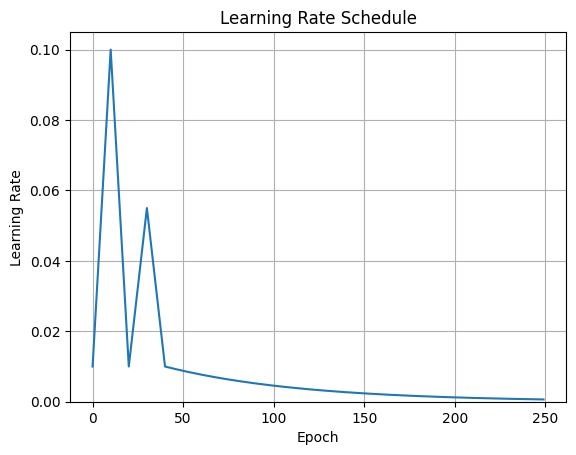

In [27]:
x_t = torch.tensor(0.0, requires_grad=True)
optimizer = Adam([x_t], lr=0.01)

# scheduler_1 = LinearLR(optimizer, start_factor=0.5, end_factor=1.0, total_iters=10)
# scheduler_2 = LinearLR(optimizer, start_factor=1.0, end_factor=0.5, total_iters=10)
scheduler_3 = ExponentialLR(optimizer, gamma=0.987)
scheduler_4 = CyclicLR(optimizer, base_lr=0.01, max_lr=0.1, step_size_up=10, step_size_down=10, mode='triangular2', cycle_momentum=False)

# scheduler = SequentialLR(optimizer, schedulers=[scheduler_1, scheduler_2, scheduler_3], milestones=[10, 20])
scheduler = SequentialLR(optimizer, schedulers=[scheduler_4, scheduler_3], milestones=[40])
lr_list = []
for epoch in range(250):
    lr_list.append(optimizer.param_groups[0]['lr'])
    optimizer.zero_grad()
    # y = f(x_t)
    # y.backward()
    optimizer.step()
    scheduler.step()
    # print(epoch, x_t.item(), f(x_t).item(), optimizer.param_groups[0]['lr'])

plt.plot(lr_list)
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Schedule")
plt.ylim(0)
plt.grid()
plt.show()